Data Wrangling

General Properties

Load data,
Get general info and overview,
Identify problems and actions to analyse research questions.

In [2]:
# This cell is used to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# pandas is a Python package providing fast, flexible, and expressive data structures designed
# NumPy is a package in Python used for Scientific Computing. NumPy package is used to perform different operations.
# seaborn: statistical data visualization. Seaborn is a Python data visualization library based on matplotlib

In [3]:
# Load data
moviedata = pd.read_csv(r'C:/Users/LENOVO/Documents/Bollywood_dataset.csv', engine='python') 

In [4]:
# Get general info
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbId       1284 non-null   object 
 1   title        1284 non-null   object 
 2   releaseYear  1284 non-null   int64  
 3   releaseDate  1231 non-null   object 
 4   genre        1282 non-null   object 
 5   writers      1165 non-null   object 
 6   actors       1281 non-null   object 
 7   directors    1280 non-null   object 
 8   sequel       1281 non-null   float64
 9   hitFlop      1284 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 100.4+ KB


In [5]:
# Get an overview
moviedata.head()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1


Data Cleaning

Checking for and dropping of duplicates

Only keep columns that are needed for analysis

Create variable "profit"
Split genres

In [6]:
# Drop duplicates
moviedata.drop_duplicates(inplace=True)
# Check if done (-1 entry)
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1283
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbId       1284 non-null   object 
 1   title        1284 non-null   object 
 2   releaseYear  1284 non-null   int64  
 3   releaseDate  1231 non-null   object 
 4   genre        1282 non-null   object 
 5   writers      1165 non-null   object 
 6   actors       1281 non-null   object 
 7   directors    1280 non-null   object 
 8   sequel       1281 non-null   float64
 9   hitFlop      1284 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 110.3+ KB


Almost all variables I need for my analysis have no null entries. Only for genres there are 23 null entries. In the next step I will first drop the null entries for genres and then only keep columns that I need for my further analysis. Plus, I will create a column showing the profit of each movie.

In [7]:
# Drop rows containing missing values in genres
moviedata.dropna(subset=['genre'], inplace=True)  
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 0 to 1283
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbId       1282 non-null   object 
 1   title        1282 non-null   object 
 2   releaseYear  1282 non-null   int64  
 3   releaseDate  1229 non-null   object 
 4   genre        1282 non-null   object 
 5   writers      1163 non-null   object 
 6   actors       1279 non-null   object 
 7   directors    1278 non-null   object 
 8   sequel       1279 non-null   float64
 9   hitFlop      1282 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 110.2+ KB


In [8]:
# Only keep columns that are needed for further analysis using movie title as index
md = moviedata[['title','releaseYear','genre','releaseDate','writers','actors','directors','hitFlop', 'sequel']]
# md.set_index('original_title', inplace=True)

In [9]:
md.columns = md.columns.str.strip()

In [10]:
# Check result
md.head()

,title,releaseYear,genre,releaseDate,writers,actors,directors,hitFlop,sequel
0,Albela,2001,Romance,20 Apr 2001,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,2,0.0
1,Lagaan: Once Upon a Time in India,2001,Adventure | Drama | Musical,08 May 2002,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,6,0.0
2,Meri Biwi Ka Jawab Nahin,2004,Action | Comedy,02 Jul 2004,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,1,0.0
3,Hum Tumhare Hain Sanam,2002,Drama | Romance,24 May 2002,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,4,0.0
4,One 2 Ka 4,2001,Action | Comedy | Drama,30 Mar 2001,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,1,0.0


In [11]:
# Split genres and create a new entry for each of the genre a movie falls into
s = md['genre'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genre'
del md['genre']
md_split_genres = md.join(s)

In [12]:
# Check result
md_split_genres.head()

,title,releaseYear,releaseDate,writers,actors,directors,hitFlop,sequel,genre
0,Albela,2001,20 Apr 2001,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,2,0.0,Romance
1,Lagaan: Once Upon a Time in India,2001,08 May 2002,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,6,0.0,Adventure
1,Lagaan: Once Upon a Time in India,2001,08 May 2002,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,6,0.0,Drama
1,Lagaan: Once Upon a Time in India,2001,08 May 2002,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,6,0.0,Musical
2,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,1,0.0,Action


In [13]:
# Check entries (should be a lot more rows since the most movies have more than one genre)
md_split_genres.shape

(2824, 9)

Exploratory Data Analysis

Explore Data

Distribution of variables

Descriptive statistics


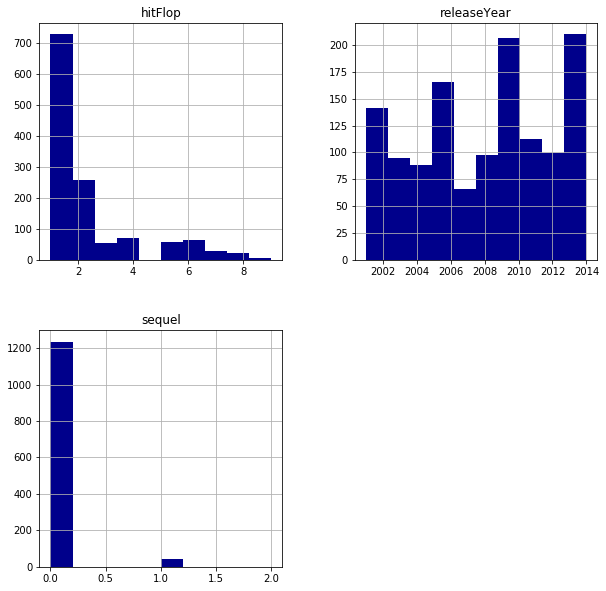

In [14]:
# Look at histograms to get idea of how variables are distrubuted (overall)
md.hist(color='DarkBlue',figsize= (10,10));

In [15]:
# Overall Descriptive statistics
md.describe()

,releaseYear,hitFlop,sequel
count,1282.000000,1282.000000,1279.000000
mean,2007.979719,2.145866,0.035184
std,4.001314,1.813671,0.188514
min,2001.000000,1.000000,0.000000
25%,2004.000000,1.000000,0.000000
50%,2008.000000,1.000000,0.000000
75%,2011.000000,2.000000,0.000000
max,2014.000000,9.000000,2.000000


In [16]:
md.nlargest(3, 'hitFlop')

,title,releaseYear,releaseDate,writers,actors,directors,hitFlop,sequel
32,Gadar: Ek Prem Katha,2001,15 Jun 2001,Shaktimaan Talwar,Sunny Deol | Ameesha Patel | Amrish Puri | Lil...,Anil Sharma,9,0.0
625,3 Idiots,2009,25 Dec 2009,Rajkumar Hirani | Abhijit Joshi | Vidhu Vinod ...,Aamir Khan | Kareena Kapoor | Madhavan | Sharm...,Rajkumar Hirani,9,0.0
901,Dhoom: 3,2013,20 Dec 2013,Vijay Krishna Acharya (story) | Aditya Chopra ...,Aamir Khan | Katrina Kaif | Tabrett Bethell | ...,Vijay Krishna Acharya,9,1.0


In [17]:
# Get movies made per year, create new data frame
md_year = pd.DataFrame(md_split_genres.groupby('releaseYear').title.nunique())
md_year.head()

,title
releaseYear,
2001,62
2002,79
2003,95
2004,88
2005,106


In [18]:
# Get max of movies made per year
md_year.nlargest(5,'title')

,title
releaseYear,
2010,116
2011,112
2014,108
2005,106
2013,102


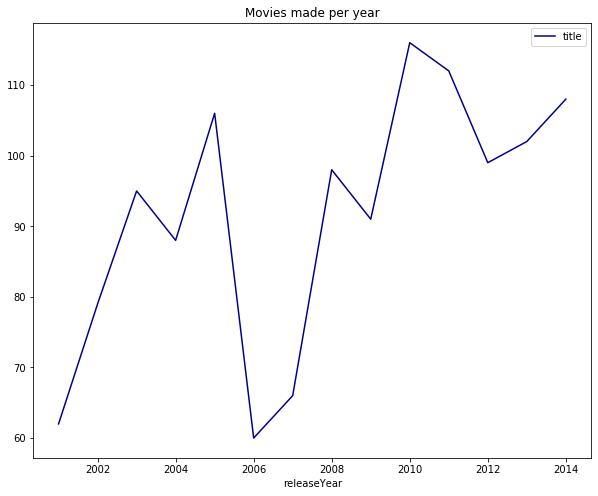

In [19]:
# Plot data, line chart for showing development over the years
md_year.plot.line(title = 'Movies made per year',color='DarkBlue',figsize=(10, 8));

In [20]:
# Get mean of variables grouped by year (new data frame) in order to see what changed
md_year_mean = md_split_genres.groupby('releaseYear').mean()

In [21]:
# Check results
md_year_mean.head()

,hitFlop,sequel
releaseYear,,
2001,2.464000,0.000000
2002,2.080925,0.017341
2003,2.136842,0.005263
2004,2.121547,0.000000
2005,2.193069,0.000000


In [23]:
# Lets turn to genres, reminder of what the split looked like
md_split_genres.head()

,title,releaseYear,releaseDate,writers,actors,directors,hitFlop,sequel,genre
0,Albela,2001,20 Apr 2001,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,2,0.0,Romance
1,Lagaan: Once Upon a Time in India,2001,08 May 2002,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,6,0.0,Adventure
1,Lagaan: Once Upon a Time in India,2001,08 May 2002,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,6,0.0,Drama
1,Lagaan: Once Upon a Time in India,2001,08 May 2002,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,6,0.0,Musical
2,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,1,0.0,Action


In [50]:
# How many different genres do we have?
md_split_genres['genre'].unique()

array(['Romance', 'Adventure ', ' Drama ', ' Musical', 'Action ',
       ' Comedy', 'Drama ', ' Romance', ' Comedy ', ' Drama', 'Musical ',
       ' Musical ', 'Comedy ', ' Biography ', ' Crime ', 'Crime ',
       ' Family', 'Action', ' Romance ', 'Drama', ' Mystery ',
       ' Thriller', 'Comedy', ' Fantasy ', ' Music', 'Thriller',
       'Thriller ', ' Mystery', ' Action', 'Musical', 'Romance ',
       ' Crime', 'Documentary', 'Biography ', ' Thriller ', ' War',
       'Mystery ', 'Crime', ' Action ', ' History', 'War ', ' Horror',
       'Family ', ' Family ', ' Fantasy', ' Adventure ', 'Horror ',
       'Family', ' Horror ', ' Adventure', 'Fantasy ', ' Sci-Fi',
       ' History ', 'Fantasy', 'Music ', ' Biography', 'Horror',
       'Mystery', 'Animation', ' Sport', 'Animation ', 'Sport',
       'Documentary ', ' Sport ', ' Music ', 'History', 'Sci-Fi',
       ' Western', 'Short ', ' Sci-Fi ', 'Adventure'], dtype=object)

Which genres have high number of movies with an voting avg. >=8?

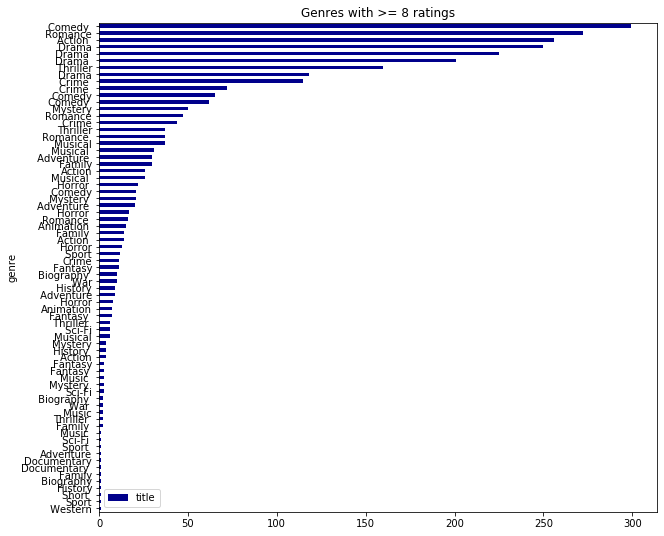

In [55]:
md_8 = md_split_genres[md_split_genres['hitFlop']>=8]
md_8 = (pd.DataFrame(md_split_genres.groupby('genre').title.nunique())).sort_values('title', ascending=True )
md_8[['title']].plot.barh(stacked=True, title = 'Genres with >= 8 ratings', figsize=(10, 9),color='DarkBlue');

In [46]:
len(md_split_genres['genre'].unique())

71

Q1. Which genres are the most common (number of movies made)?

In [31]:
# Group movies by genre using title as unique identifier and display all genres.
md_genre = (pd.DataFrame(md_split_genres.groupby('genre').title.nunique())).sort_values('title', ascending=True)
md_genre.head(20)

,title
genre,
Western,1
Sport,1
Short,1
History,1
Biography,1
Family,1
Documentary,1
Documentary,1
Adventure,1


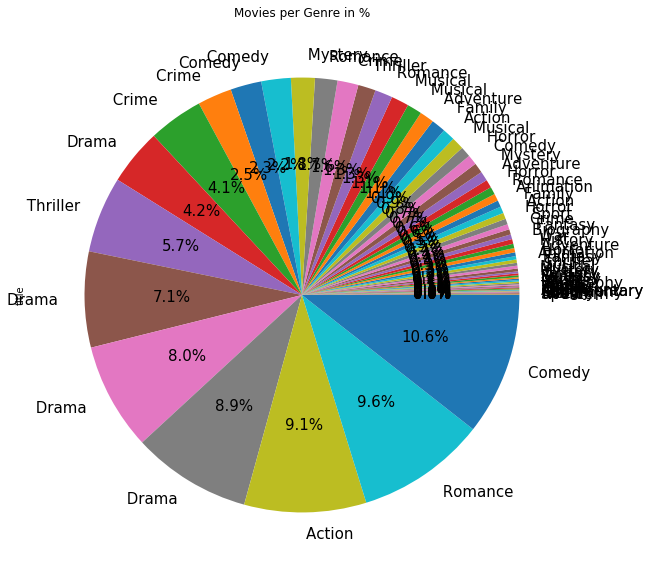

In [32]:
md_genre['title'].plot.pie(title= 'Movies per Genre in %', figsize=(10,10), autopct='%1.1f%%',fontsize=15);

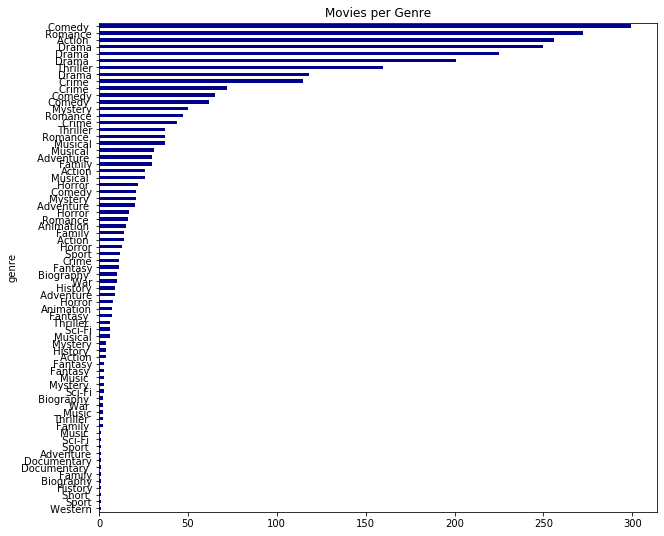

In [34]:
# Display in bar chart
md_genre['title'].plot.barh(title = 'Movies per Genre',color='DarkBlue', figsize=(10, 9));

In [56]:
# Reminder of how the data frame looked like, when we splitted for genres
md_split_genres.head()

,title,releaseYear,releaseDate,writers,actors,directors,hitFlop,sequel,genre
0,Albela,2001,20 Apr 2001,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,2,0.0,Romance
1,Lagaan: Once Upon a Time in India,2001,08 May 2002,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,6,0.0,Adventure
1,Lagaan: Once Upon a Time in India,2001,08 May 2002,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,6,0.0,Drama
1,Lagaan: Once Upon a Time in India,2001,08 May 2002,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,6,0.0,Musical
2,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,1,0.0,Action


In [58]:
# Create data frame for average popularity per genre per year
md_year_genre_profit = pd.DataFrame(md_split_genres.groupby(['releaseYear','genre'])['hitFlop'].mean())
md_year_genre_profit.head()

hitFlop
releaseYear genre                
2001         Action      2.000000
             Biography   1.000000
             Comedy      5.000000
             Comedy      2.000000
             Crime       1.666667

In [61]:
# pivot data to get the shape that is necessary for a heatmap that displays genres, years and avg. hitflop per genre per year
md_heat_pivot = pd.pivot_table(md_year_genre_profit, values='hitFlop', index=['genre'], columns=['releaseYear'])
md_heat_profit_pivot.head()

releaseYear,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
genre,,,,,,,,,,,,,,
Action,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Action,NaN,1.5,1.333333,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
Adventure,NaN,NaN,2.000000,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
Adventure,NaN,NaN,2.500000,3.0,3.0,5.0,1.0,2.0,1.4,2.5,2.25,2.0,2.0,5.0
Biography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


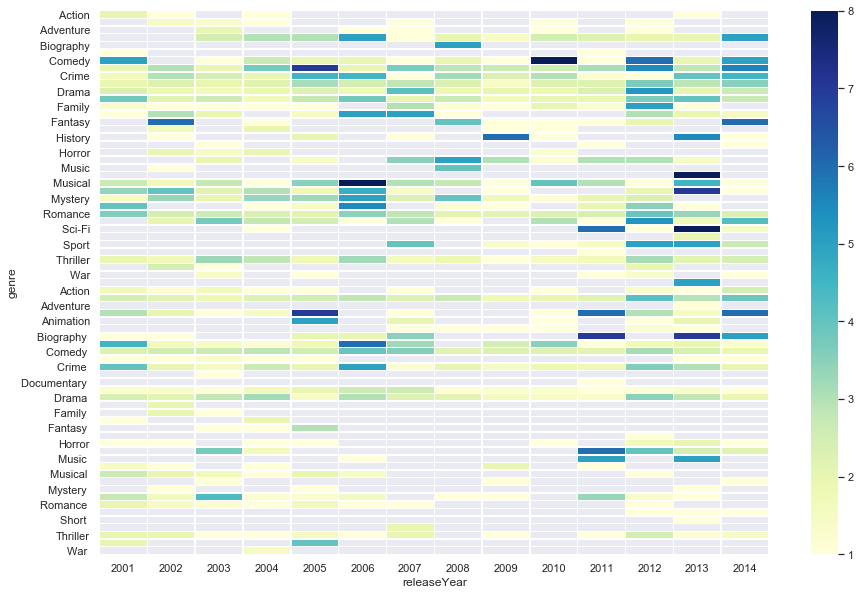

In [62]:
# display heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(md_heat_profit_pivot, linewidths=.5, cmap='YlGnBu');

Vote Average per genre per year


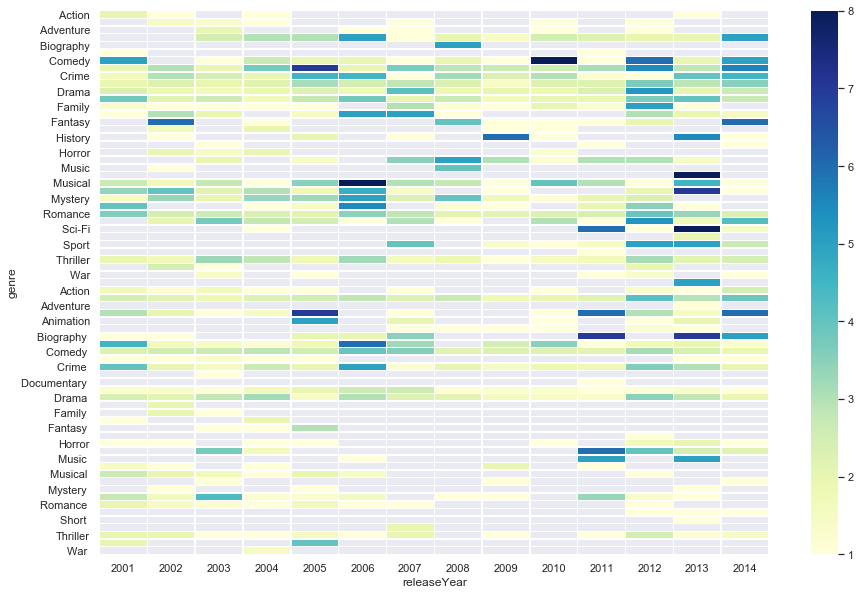

In [65]:
md_year_genre_vote_avg = pd.DataFrame(md_split_genres.groupby(['releaseYear','genre'])['hitFlop'].mean())
md_heat_vote_avg_pivot = pd.pivot_table(md_year_genre_vote_avg, values='hitFlop', index=['genre'], columns=['releaseYear'])
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(md_heat_vote_avg_pivot, linewidths=.5, cmap='YlGnBu');

Scatter plot analysis

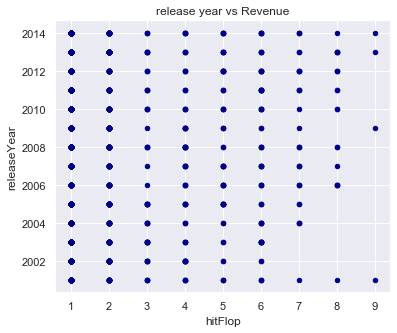

In [70]:
md.plot.scatter(x='hitFlop', y='releaseYear',title='hitFlop vs release year', color='DarkBlue', figsize=(6,5));